In [1]:
import h5py
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = h5py.File('data/example.hd5', 'r')

In [3]:
list(f.keys())

['categorical',
 'continuous',
 'dates',
 'ecg_rest',
 'ecg_rest_date',
 'ecg_rest_text',
 'ukb_ecg_rest']

In [4]:
con = f['continuous']
con.get('VentricularRate')[0]

58.0

<IPython.core.display.Javascript object>


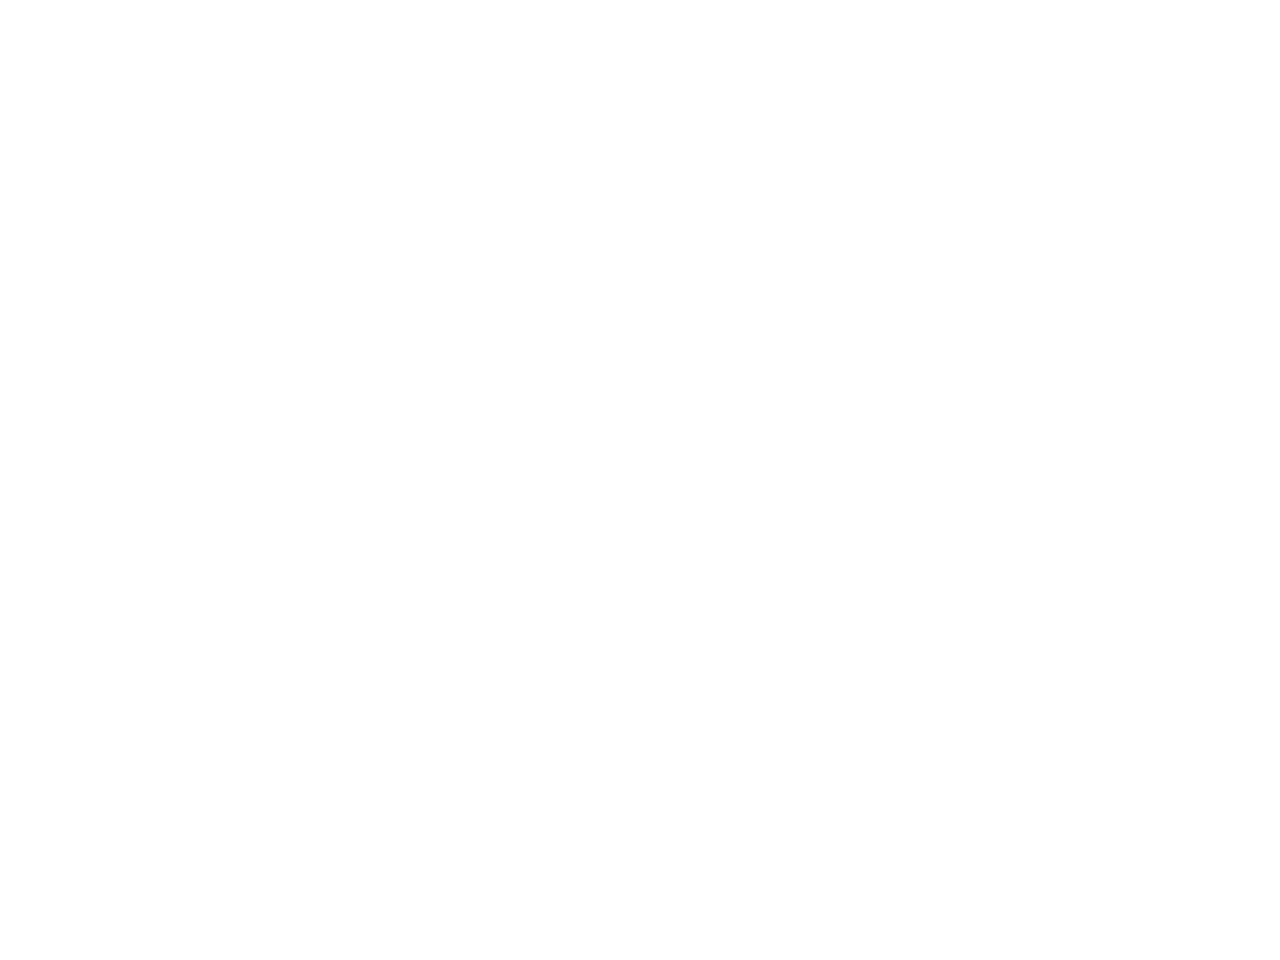

In [5]:
ecg_rest = f['ecg_rest']

ecg_key_string_list = [ 
    "strip_I", 
    "strip_II",
    "strip_III",
    "strip_V1",
    "strip_V2",
    "strip_V3",
    "strip_V4",
    "strip_V5",
    "strip_V6",
    "strip_aVF",
    "strip_aVL",
    "strip_aVR"
]

# Plot start
fig, axs = plt.subplots(3, 4, sharex='col', sharey='row', gridspec_kw={'hspace':0, 'wspace':0})
fig.suptitle('Example ECG waveform data')

for (i, key) in enumerate(ecg_key_string_list):
    wave = ecg_rest.get(key)
    axs[i//4, i%4].set_title(key)
    axs[i//4, i%4].plot(wave)
    
for ax in axs.flat:
    ax.label_outer()


In [6]:
x_list = list()
for (i, key) in enumerate(ecg_key_string_list):
    x = ecg_rest.get(key)[:]
    x_list.append(x)

x_list = np.array(x_list)
x_list

array([[  -6.,   -6.,   -6., ..., -214., -213., -213.],
       [  37.,   36.,   36., ...,  -93.,  -90.,  -87.],
       [  43.,   42.,   42., ...,  121.,  123.,  126.],
       ...,
       [  40.,   39.,   39., ...,   14.,   17.,   20.],
       [ -24.,  -24.,  -24., ..., -167., -168., -169.],
       [ -15.,  -15.,  -15., ...,  154.,  152.,  150.]])

In [7]:
# import numpy as np
# np_arr = np.asarray(ecg_rest.get('strip_aVL')[:])

plt.plot(x_list[4, :])
plt.show()


<IPython.core.display.Javascript object>


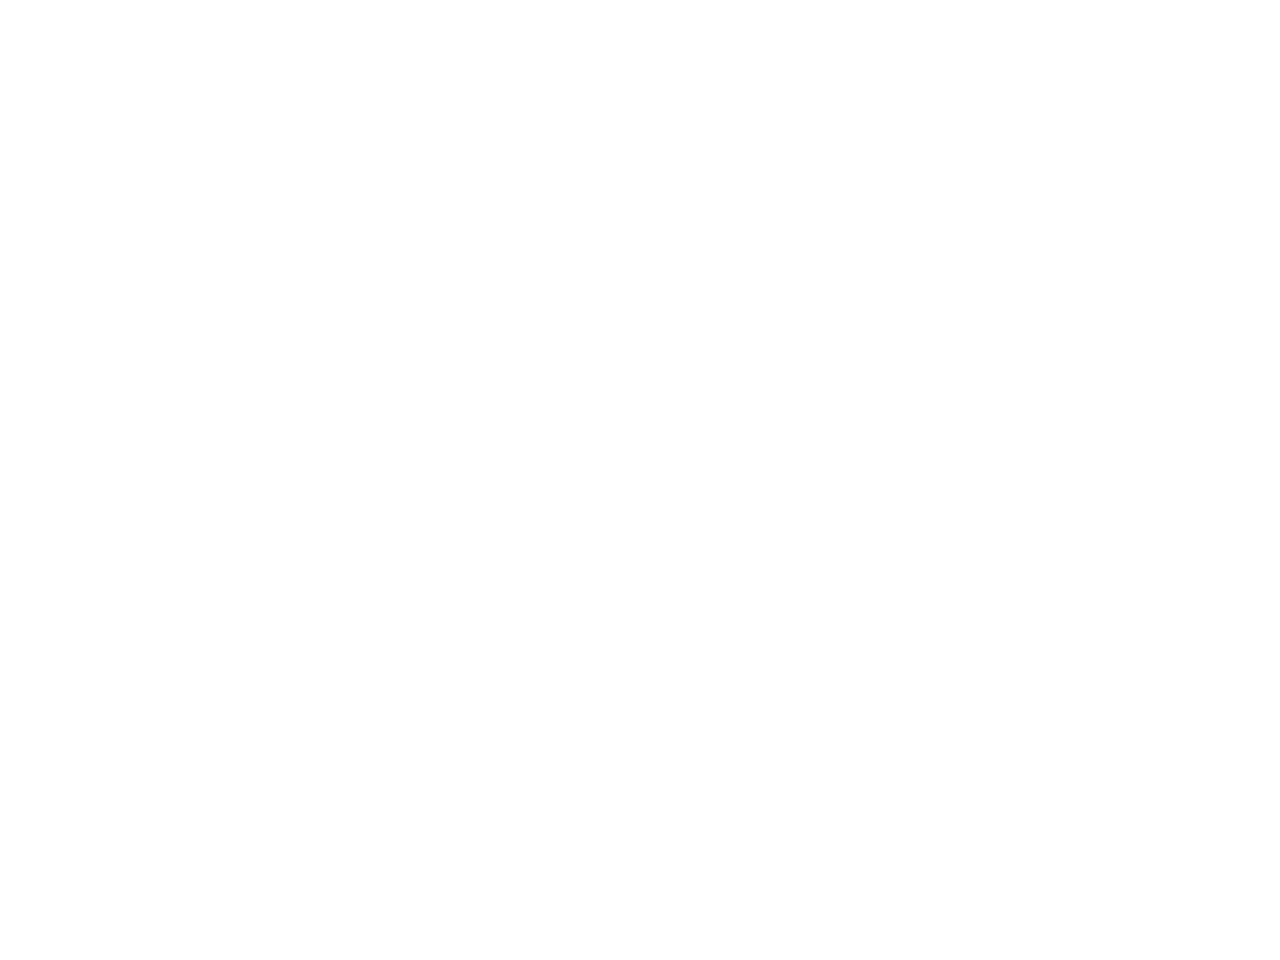

In [8]:
plt.close()
np_arr = x_list.reshape([12, 12//12, 500, 5000//500]).mean(3).mean(1)
plt.plot(np_arr[2, :])
plt.show()

In [9]:
plt.close()
plt.plot(x_list[3, :])
plt.show()

<IPython.core.display.Javascript object>

In [10]:
from biosppy.signals import ecg

<IPython.core.display.Javascript object>


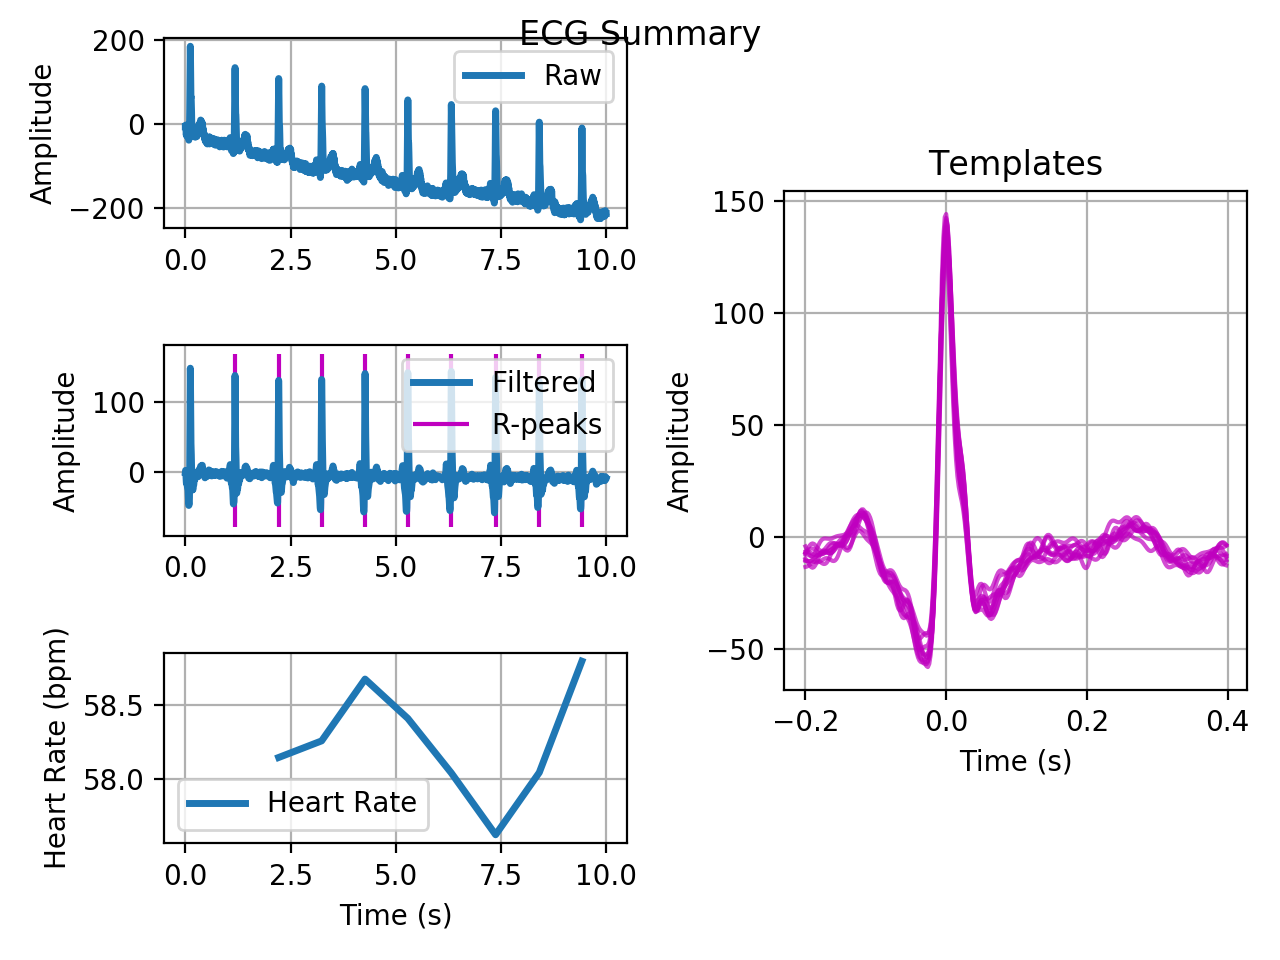

In [23]:
out = ecg.ecg(signal=x_list[0, :], sampling_rate = 500., show=True)

<IPython.core.display.Javascript object>


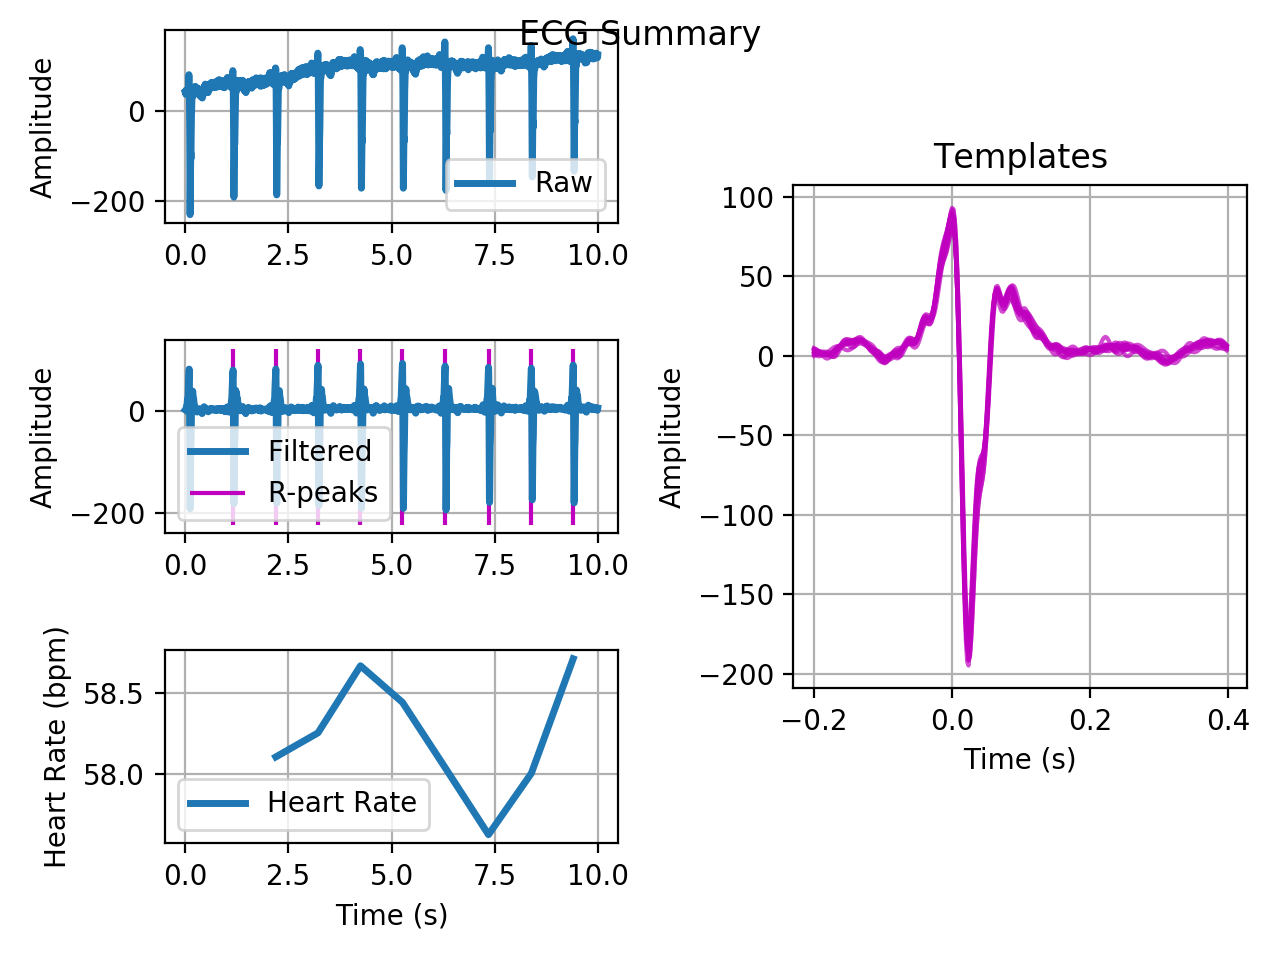

In [26]:
out = ecg.ecg(signal=x_list[2, :], sampling_rate = 500., show=True)

<IPython.core.display.Javascript object>


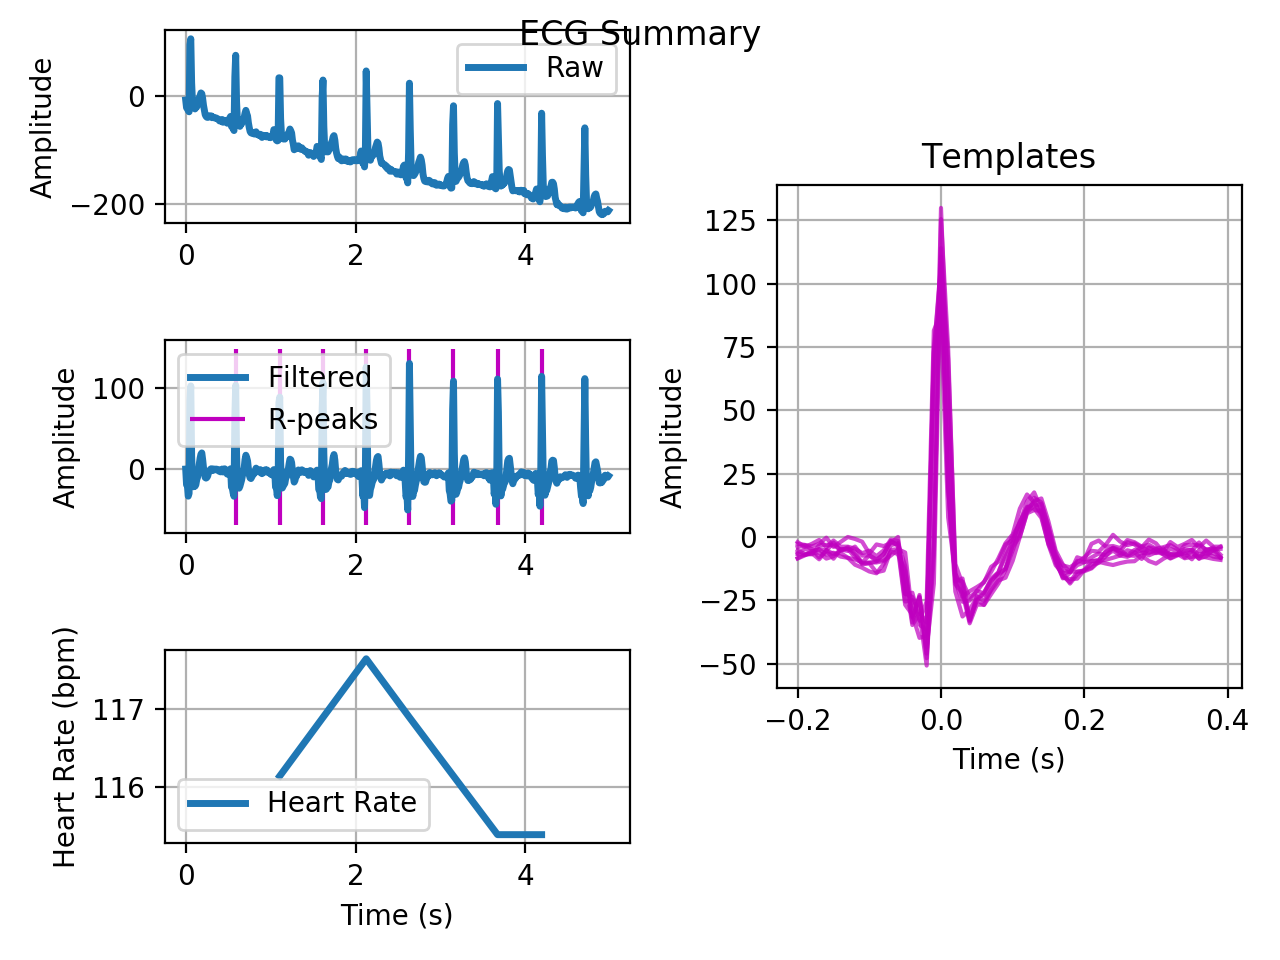

In [28]:
out = ecg.ecg(signal=np_arr[0, :], sampling_rate = 100., show=True)

In [16]:
out['filtered'].shape

(500,)

In [17]:
np.max(out['filtered'])

62.01280677010622

In [18]:
np.min(out['filtered'])

-175.68863229046312

In [19]:
np.max(out['filtered'])

62.01280677010622

In [20]:
np.min(out['filtered'])

-175.68863229046312

In [24]:
out['heart_rate']

array([58.14348861, 58.25551083, 58.67272747, 58.4072441 , 58.03880598,
       57.62158935, 58.04207543, 58.79351444])

In [25]:
np.mean(out['heart_rate'])

58.24686952591354